In [1]:
using Gmsh: gmsh
using Gridap
using GridapGmsh
using Gridap.TensorValues
using PyPlot
using LinearAlgebra

In [2]:
const L = 100
const CH = 25         #Crack height
const CW = 0.01*CH    #Crack Width
const hf = CH/100     #Mesh size parameter
const hfc = hf/4      #Mesh size parameter
const h = 10*hf       #Mesh size parameter
const lsp = hf*2.1

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0.0, h)
p3 = gmsh.model.geo.addPoint(L, 0.5*(L-CW), 0.0, h)
p4 = gmsh.model.geo.addPoint(L-CH, 0.5*(L-CW), 0.0, hfc)
p5 = gmsh.model.geo.addPoint(L-CH, 0.5*(L+CW), 0.0, hfc)
p6 = gmsh.model.geo.addPoint(L, 0.5*(L+CW), 0.0, h)
p7 = gmsh.model.geo.addPoint(L, L, 0.0, h)
p8 = gmsh.model.geo.addPoint(0.0, L, 0.0, h)
p9 = gmsh.model.geo.addPoint(0.0, 0.5*(L+CW), 0.0, h)
p10 = gmsh.model.geo.addPoint(CH, 0.5*(L+CW), 0.0, hfc)
p11 = gmsh.model.geo.addPoint(CH, 0.5*(L-CW), 0.0, hfc)
p12 = gmsh.model.geo.addPoint(0.0, 0.5*(L-CW), 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p1)

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12])
ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(1, [l1])
pg3 = gmsh.model.addPhysicalGroup(1, [l7])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(1, pg2, "DirichletBottom")
gmsh.model.setPhysicalName(1, pg3, "LoadLine")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", 0.5*(L-3*CH))
gmsh.model.mesh.field.setNumber(11, "XMax", 0.5*(L+3*CH))
gmsh.model.mesh.field.setNumber(11, "YMin", 0.5*(L-2*CH))
gmsh.model.mesh.field.setNumber(11, "YMax", 0.5*(L+2*CH))

gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("DoubleEdgeNotch.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00854252s, CPU 0.008391s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.7892s, CPU 2.75503s)
Info    : 69936 nodes 139882 elements
Info    : Writing 'DoubleEdgeNotch.msh'...
Info    : Done writing 'DoubleEdgeNotch.msh'


In [3]:
model = GmshDiscreteModel("DoubleEdgeNotch.msh")
writevtk(model,"DoubleEdgeNotch")

Info    : Reading 'DoubleEdgeNotch.msh'...
Info    : 25 entities
Info    : 69936 nodes
Info    : 139518 elements
Info    : Done reading 'DoubleEdgeNotch.msh'


3-element Vector{Vector{String}}:
 ["DoubleEdgeNotch_0.vtu"]
 ["DoubleEdgeNotch_1.vtu"]
 ["DoubleEdgeNotch_2.vtu"]

In [4]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

139438-element Vector{Int8}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

In [5]:
const G = 12.5e3
const ν = 0.2
const E = G*(2*(1+ν))
l = 15.0
N = 0.3
Gc = 0.1

const η = 1e-15

1.0e-15

In [6]:
μ = 11263.7362637363
κ = 2472.527472527478
λ = 8333.333333333363
γ = 1.1250000000000035e7

1.1250000000000035e7

In [7]:
function Eigen(ε)
    εArray = get_array(ε)
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end 
    εPos = TensorValue(P*Λpos*P')
    εNeg = TensorValue(P*Λneg*P')
    if tr(ε) >= 0
        ψPos = 0.5*(λ*(tr(ε))^2 + (2*μ+κ)*(εPos ⊙ εPos))
        ψNeg = 0.5*(2*μ+κ)*(εNeg ⊙ εNeg)
    else
        ψPos = 0.5*((2*μ+κ)*(εPos ⊙ εPos))
        ψNeg = 0.5*(λ*(tr(ε))^2 +(2*μ+κ)*(εNeg ⊙ εNeg))
    end
    if ψPos >= ψNeg
        case = 1
    else
        case = 2
    end
    return case, ψPos, ψNeg 
end

Eigen (generic function with 1 method)

In [8]:
function σ_Bmod(ε, ε_in, s_in)
    case, ψP, ψN = Eigen(ε_in)
    if case == 1
        σM = (s_in^2 + η)*(λ*tr(ε)*one(ε) + (2*μ + κ)*(ε))
    else
        σM = (λ*tr(ε)*one(ε) + (2*μ + κ)*(ε))
    end
    return σM
end

σ_Bmod (generic function with 1 method)

In [9]:
E_Matrx = TensorValue(0,-1,1,0)

TensorValue{2, 2, Int64, 4}(0, -1, 1, 0)

In [10]:
function ε_Skw(∇,θ)
    ∇ᵀ = transpose(∇)
    w = (0.5*(∇ᵀ - ∇)) - (E_Matrx*θ)
    return w
end

ε_Skw (generic function with 1 method)

In [11]:
function σ_Cmod(ϵ_skew, s_in)
    σM = gd(s_in)*(κ*ϵ_skew)
    return σM
end

σ_Cmod (generic function with 1 method)

In [12]:
function M_mod(∇, s_in)
    M = gd(s_in)*(γ*∇)
    return M
end

M_mod (generic function with 1 method)

In [13]:
function gd(s_in)
    M = s_in^2
    return M
end

gd (generic function with 1 method)

In [14]:
function ψPos(ε_in,∇_uh,θ, ∇_th)
    ∇_uhᵀ = transpose(∇_uh)
    ϵ_skew = 0.5*(∇_uhᵀ - ∇_uh) - E_Matrx*θ
    case, ψP, ψN = Eigen(ε_in)
    ψPos = ψP + 0.5*(κ*(ϵ_skew ⊙ ϵ_skew)) + 0.5*γ*(∇_th ⋅ ∇_th)
    return ψPos 
end

ψPos (generic function with 1 method)

In [15]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
    ψPlus_in = ψhPos_in
        if ψPlus_in >= ψPlusPrev_in
            ψPlus_out = ψPlus_in
        else
            ψPlus_out = ψPlusPrev_in
        end
    true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [16]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [17]:
order = 1
degree = 2*order

2

In [18]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [19]:
sId = CellState(1.0,dΩ)
shId = project(sId,model,dΩ,order)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 1820915678341885466

In [20]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 40
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 146657134383870865

In [21]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;conformity=:H1)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 1820915678341885466

In [22]:
reffe_theta = ReferenceFE(lagrangian,Float64,order)
V0_theta  = TestFESpace(model,reffe_theta;
  conformity=:H1)
θh = zero(V0_theta)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 1820915678341885466

In [23]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletBottom","LoadLine"],
          dirichlet_masks=[(true,true), (true,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 139438
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 1820915678341885466

In [24]:
V0 = MultiFieldFESpace([V0_Disp,V0_theta])

MultiFieldFESpace()

In [25]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
    U_PF = TrialFESpace(V0_PF)
        a_PF(s,ϕ) = ∫( (Gc*lsp*(∇(ϕ)⋅ ∇(s))) + (2*s*ψPlusPrev_in*ϕ)  + ((Gc/lsp)*s*ϕ) )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)
    return sh_out
end

stepPhaseField (generic function with 1 method)

In [26]:
function Skw(u,θ)
    ∇ᵀ = transpose(∇(u))
    w = (0.5*(∇ᵀ - ∇(u)) - (E_Matrx*θ))
    return w
end

Skw (generic function with 1 method)

In [27]:
function stepDisp(uh_in,θ_in,sh_in,uApp)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(uApp,uApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2])
        
        θApp1(x) = 0.0
        U_theta = TrialFESpace(V0_theta)
        U = MultiFieldFESpace([U_Disp,U_theta ])

        a((u,θ),(w,v))  = ∫( (ε(w) ⊙ (σ_Bmod∘(ε(u),ε(uh_in),sh_in)) ) + ((Skw(w,v)) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ), sh_in)) ) + ((∇(v))⋅ (M_mod∘(∇(θ),sh_in))) - (v*((E_Matrx) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ),sh_in))) ))*dΩ
        b((w,v))= 0
        op_Disp = AffineFEOperator(a,b,U,V0)
        uh_out = solve(op_Disp)
        uh_out,phih_out = uh_out
    return uh_out, phih_out
end

stepDisp (generic function with 1 method)

In [28]:
cd("DoubleNotch_N0.3_l30")

In [1]:
0.05/40

0.00125

In [29]:
uApp = 0
delu = 0.05/40
uAppMax = 0.05
innerMax = 10
count = 0
Load = Float64[]
LoadX = Float64[]
Displacement = Float64[]

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)
ψhPos = CellState(0.0,dΩ)
ψhPos_in = project(ψhPos,model,dΩ,order)

while uApp .< uAppMax 
        
    uApp = uApp .+ delu
    count = count .+ 1
    
    print("\n Entering displacemtent step$count :", float(uApp))
    
    for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        err = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(err))
        
        sh = stepPhaseField(uh,ψhPlusPrev)
        uh,θh = stepDisp(uh,θh,sh,uApp)
        
        ψhPos_in = ψPos∘(ε(uh),∇(uh),θh,∇(θh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if err < 1e-8
            break 
        end
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_Bmod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_Cmod∘(ε_Skw∘(∇(uh),θh),sh) ) )  *dΓ_Load)
    Load_Act = sqrt(Node_Force[1]^2 + Node_Force[2]^2)
    uApp_Act = uApp^2 + uApp^2
    
    push!(Load, Load_Act)
    push!(LoadX, Node_Force[1])
    push!(Displacement, uApp_Act)
    if mod(count,10) == 0
         writevtk(Ω,"results_DoubleNotch_N0.3_l30$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh),"Sig"=>(σ_Bmod∘(ε(uh),ε(uh),sh))])
    end
end


 Entering displacemtent step1 :0.00125
 Relative error = 3.202033167584182e-17
 Entering displacemtent step2 :0.0025
 Relative error = 2.38509906645367e-5
 Relative error = 7.154812194102779e-5
 Relative error = 1.3391798218549607e-8
 Relative error = 4.404107632721407e-11
 Entering displacemtent step3 :0.00375
 Relative error = 1.9735106561176581e-13
 Entering displacemtent step4 :0.005
 Relative error = 0.00011920927123987038
 Relative error = 0.00016685554262015062
 Relative error = 1.257791051445601e-7
 Relative error = 1.6673111245502264e-9
 Entering displacemtent step5 :0.00625
 Relative error = 3.0122583581840426e-11
 Entering displacemtent step6 :0.007500000000000001
 Relative error = 0.0002142992706322759
 Relative error = 0.00026191788664561903
 Relative error = 4.518278908267402e-7
 Relative error = 1.3747134323964288e-8
 Relative error = 5.700148626918675e-10
 Entering displacemtent step7 :0.00875
 Relative error = 2.522326165994723e-11
 Entering displacemtent step8 :0.01


┌ Warning: detected extension '.3_l3010' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step11 :0.013749999999999998
 Relative error = 4.176175882482281e-10
 Entering displacemtent step12 :0.014999999999999998
 Relative error = 0.0004948953442025808
 Relative error = 0.0005440122387557061
 Relative error = 4.216547251186902e-6
 Relative error = 5.625799295626296e-7
 Relative error = 1.0125536673150016e-7
 Relative error = 1.9494977742452846e-8
 Relative error = 3.820575336559486e-9
 Entering displacemtent step13 :0.016249999999999997
 Relative error = 7.526004134732046e-10
 Entering displacemtent step14 :0.017499999999999998
 Relative error = 0.0005854242110976954
 Relative error = 0.0006364144934356074
 Relative error = 7.158808216281958e-6
 Relative error = 1.3699144142506802e-6
 Relative error = 3.5243729187312116e-7
 Relative error = 9.69681197482362e-8
 Relative error = 2.7166764963421046e-8
 Relative error = 7.652256244308494e-9
 Entering displacemtent step15 :0.01875
 Relative error = 2.159139111130091e-9
 Entering displacemtent step16 :0.0

┌ Warning: detected extension '.3_l3020' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step21 :0.026250000000000006
 Relative error = 1.94275879139054e-6
 Relative error = 0.0008872167110243893
 Relative error = 2.7340687749246983e-5
 Relative error = 1.7018616005764002e-5
 Relative error = 1.462242014226097e-5
 Relative error = 1.367811831335258e-5
 Relative error = 1.3311723788591492e-5
 Relative error = 1.3312661352463422e-5
 Relative error = 1.3627963217513947e-5
 Relative error = 1.4178048326055934e-5
 Entering displacemtent step22 :0.027500000000000007
 Relative error = 1.4962419453199669e-5
 Relative error = 0.0008638667273846654
 Relative error = 4.991312793286794e-5
 Relative error = 4.2456843763374926e-5
 Relative error = 4.2706948982767735e-5
 Relative error = 4.294107057242796e-5
 Relative error = 4.286162156505339e-5
 Relative error = 4.166307530533966e-5
 Relative error = 4.0018153287077566e-5
 Relative error = 3.838939306453811e-5
 Entering displacemtent step23 :0.028750000000000008
 Relative error = 3.6648933430242956e-5
 Relative

┌ Warning: detected extension '.3_l3030' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step31 :0.038750000000000014
 Relative error = 0.0002155630178706905
 Relative error = 0.00032675109904861167
 Relative error = 0.0002387650859993415
 Relative error = 0.0002128208532756357
 Relative error = 0.00019352459956181148
 Relative error = 0.00017772702070450097
 Relative error = 0.00016403349032957507
 Relative error = 0.0001518707883851744
 Relative error = 0.00014133206379111799
 Relative error = 0.00013133915140940952
 Entering displacemtent step32 :0.040000000000000015
 Relative error = 0.0001218828935242477
 Relative error = 0.00019318102955515233
 Relative error = 0.00013803563818706217
 Relative error = 0.00012284147103501131
 Relative error = 0.00011279111227091397
 Relative error = 0.00010356611384658565
 Relative error = 9.599945804900068e-5
 Relative error = 8.95299663754898e-5
 Relative error = 8.402463865746229e-5
 Relative error = 7.824694401967208e-5
 Entering displacemtent step33 :0.041250000000000016
 Relative error = 7.34358794610400

┌ Warning: detected extension '.3_l3040' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112


In [30]:
writevtk(Ω,"results_DoubleNotch_N0.3_l30$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh),"Sig"=>(σ_Bmod∘(ε(uh),ε(uh),sh))])

┌ Warning: detected extension '.3_l3040' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK /home/akash/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112


(["results_DoubleNotch_N0.3_l3040.vtu"],)

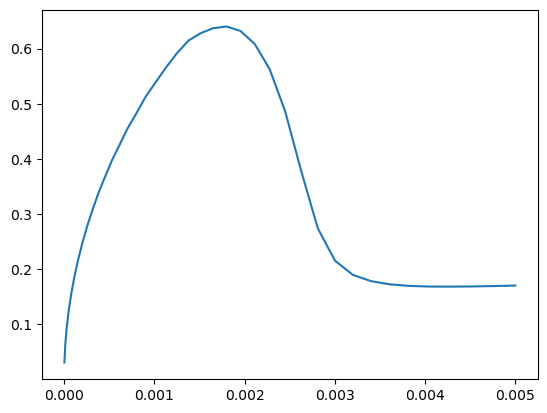

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe0881f32b0>

In [31]:
plot(Displacement,Load*1e-3)

In [32]:
cd("../DispLoadData_DoubleNotch")

In [33]:
using DelimitedFiles
Disp = writedlm( "DispDataDoubleNotchSpectral_N0.3_l30.csv",  Displacement, ',')
Force = writedlm("LoadDataDoubleNotchSpectral_N0.3_l30.csv",  Load, ',')